In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm
#%matplotlib notebook

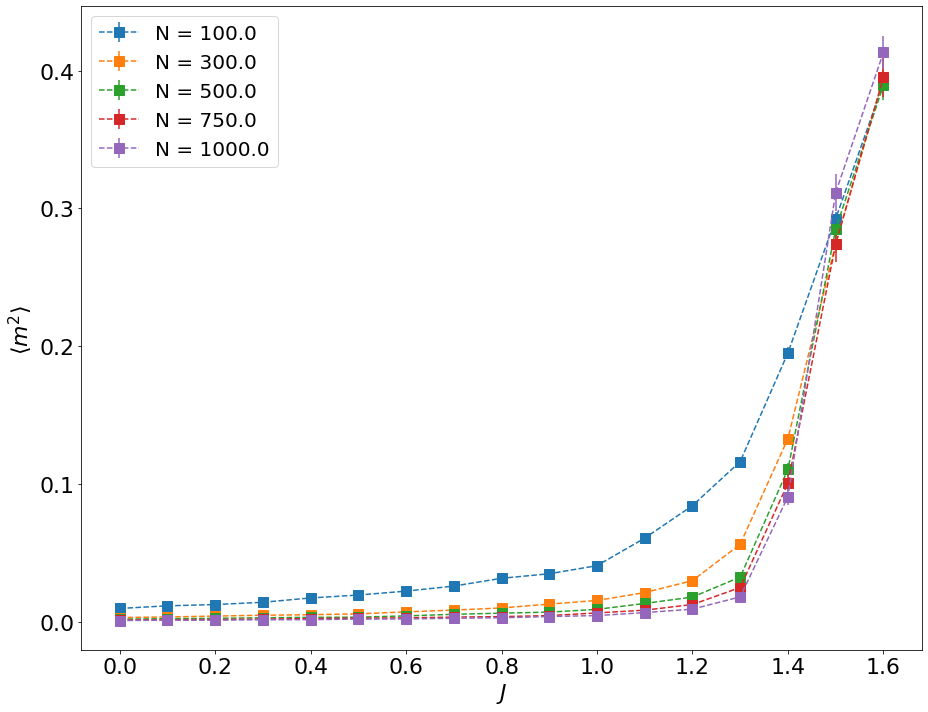

In [2]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=0)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    
    bc = data_l[:,17]
    #print(1/bc)
    #print( (2/data_l[:,19])**0.5 )
    errs = data_l[:,18]
    #errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    #errs=np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle m^2 \rangle $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/magnetization2_shortchains.png", bbox_inches='tight')

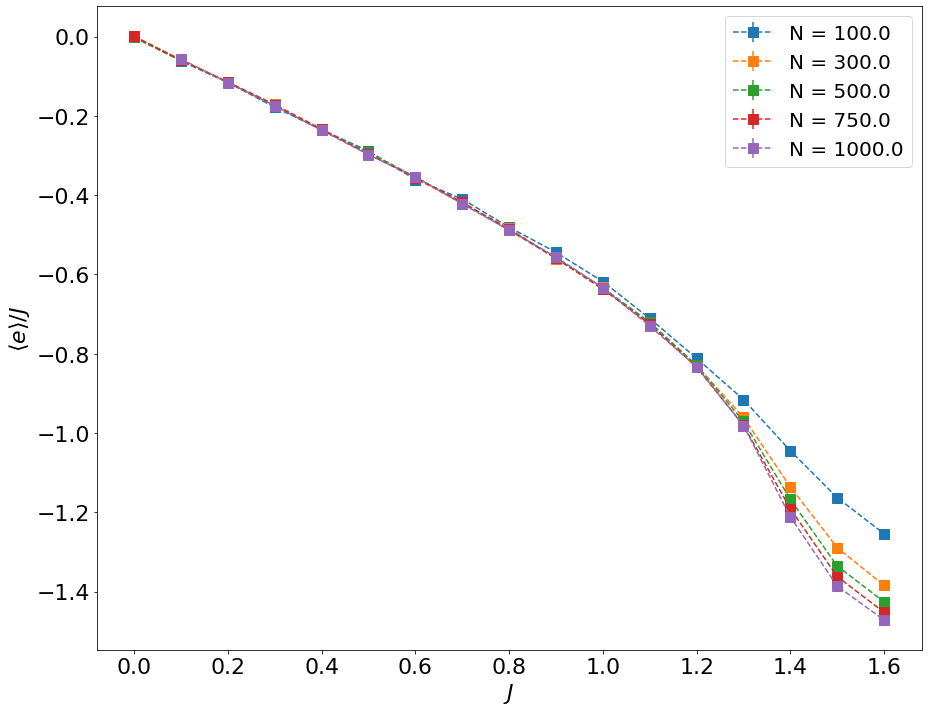

In [3]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
   
    if l==10000: continue 
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    bc = -data_l[:,7] 
    errs = data_l[:,8]
 

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
#plt.plot([0.72, J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ \langle e \rangle / J $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.ylim(-0.02, 0.7)

#plt.grid()

plt.legend(loc="best", fontsize=20)

plt.tight_layout()

plt.savefig("Thesis/Images/energy_shortchains.png", bbox_inches='tight')

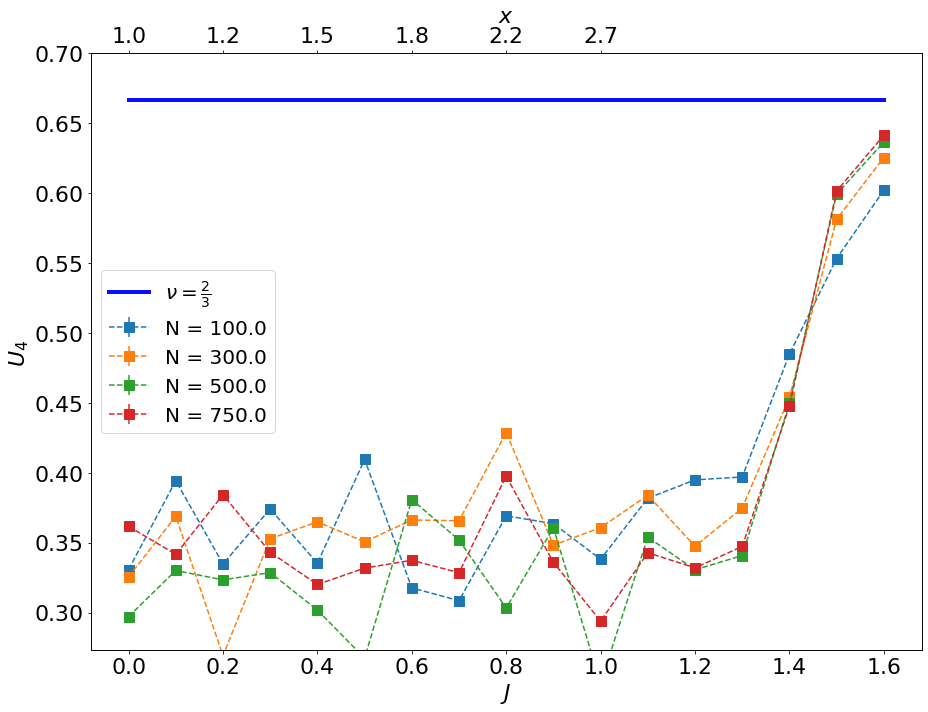

In [4]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)


lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    if l==10000: continue
        
    if l==1000: continue
        
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]    
    
    
    J_l = data_l[:, 1]
    
    #print(bc)
    #print(data_l[:,17])
    
    bc = 1 - data_l[:,19]/3/data_l[:,17]/data_l[:,17]
    #print(bc)
  
    errs = (2*data_l[:,18] / data_l[:,17])**2 + (data_l[:,20] /data_l[:,19])
    errs=0*np.sqrt(errs)*bc

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
plt.plot([J_l[0], J_l[-1]], [2/3, 2/3], "-", label=r"$\nu=\frac{2}{3}$", c="b",lw=4, alpha=0.95)
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(1/3 -0.06, 0.7)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.tight_layout()

plt.savefig("Thesis/Images/bindercumulants_shortchains.png", bbox_inches='tight')

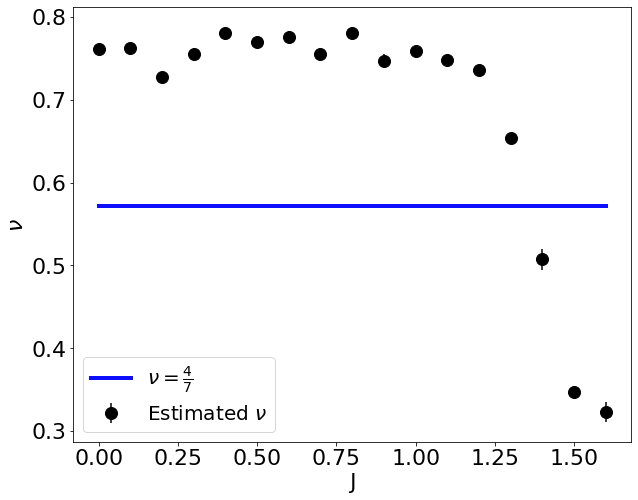

In [5]:
def r_on_n(n, nu, b):
    return 2*nu*n+b
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)
J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l :
    data_l = data_np[data_np[:,1]==J]
    data_l = data_l[data_l[:,0]>99]
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,6] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    

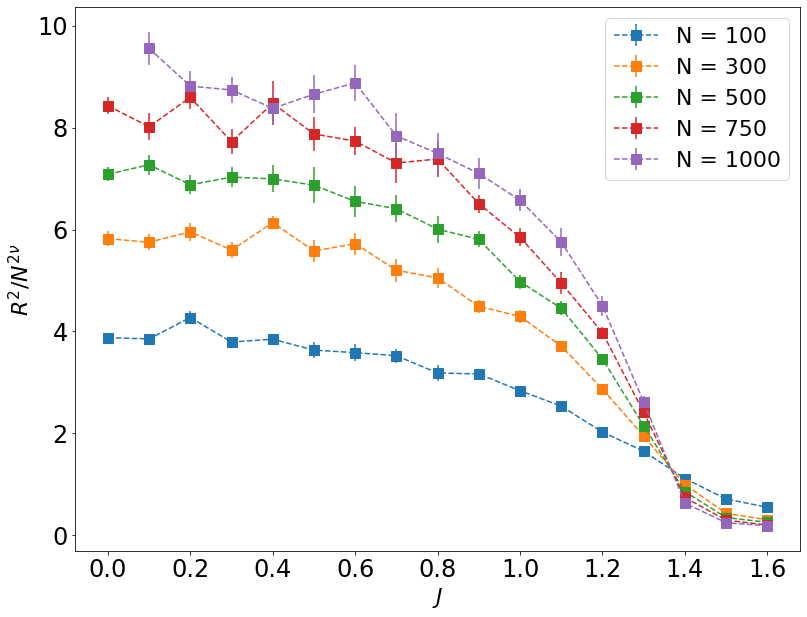

In [6]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

nu=4/7

for l in lengths:
    if (l==10000):
        continue
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    J_l = data_l[:, 1]
    r_l = data_l[:, 3]
    
    bc = r_l/np.power(l, 2*nu)
 
    errs = data_l[:, 4]/np.power(l, 2*nu)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(int(l)))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ R^2/N^{2 \nu} $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=24) 
plt.tick_params(axis='y', labelsize=24) 
#plt.xlim(0.76, 0.9)
#plt.ylim(0.1, 4.5)

plt.legend(fontsize=22)

#plt.grid()

#plt.savefig("/home/kamilla/Lattice_models/img/rscaling.png")

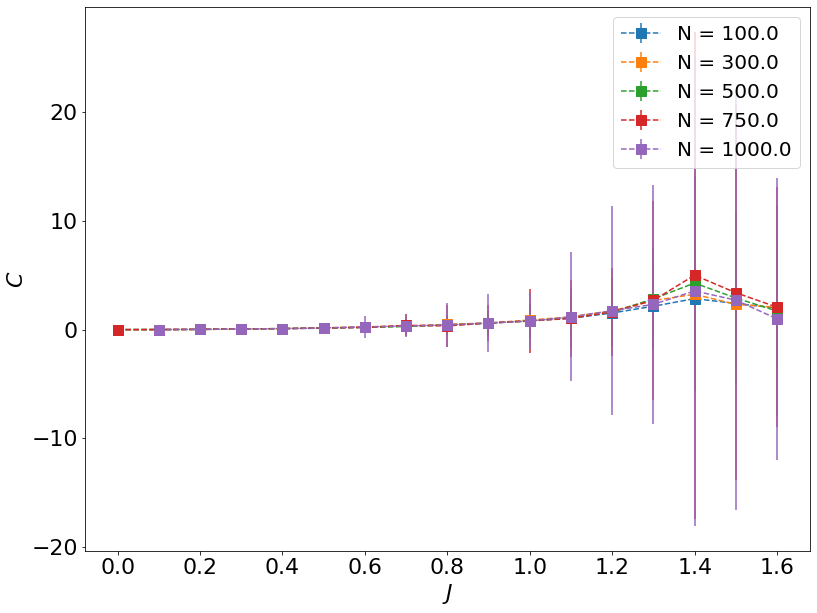

In [7]:
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)

lengths = np.unique(data_np[:, 0])

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)

 
for l in lengths:
    if (l==10000):
        continue
     
    data_l = data_np[data_np[:,0]==l]
    
    ind = np.argsort(data_l[:,1])
    data_l=data_l[ind]
    
    J_l = data_l[:, 1]
    
    bc = []
    errs=[]
    
    for j in range(len(J_l)):
        e1 = norm.rvs(data_l[j, 7], data_l[j, 8], size = 1000)
        e2 = norm.rvs(data_l[j, 9], data_l[j, 10], size = 1000)
    
        cum = (e2 - e1*e1)*np.square(J_l[j])*l
        mean = np.mean(cum)
        
        err=np.std(cum)#/np.sqrt(len(cum))
        
        bc.append(mean)
        errs.append(err)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ C  $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#plt.xlim(-20, 20)

#plt.axvline(x=0, c="k" )

plt.legend(loc="best", fontsize=20)

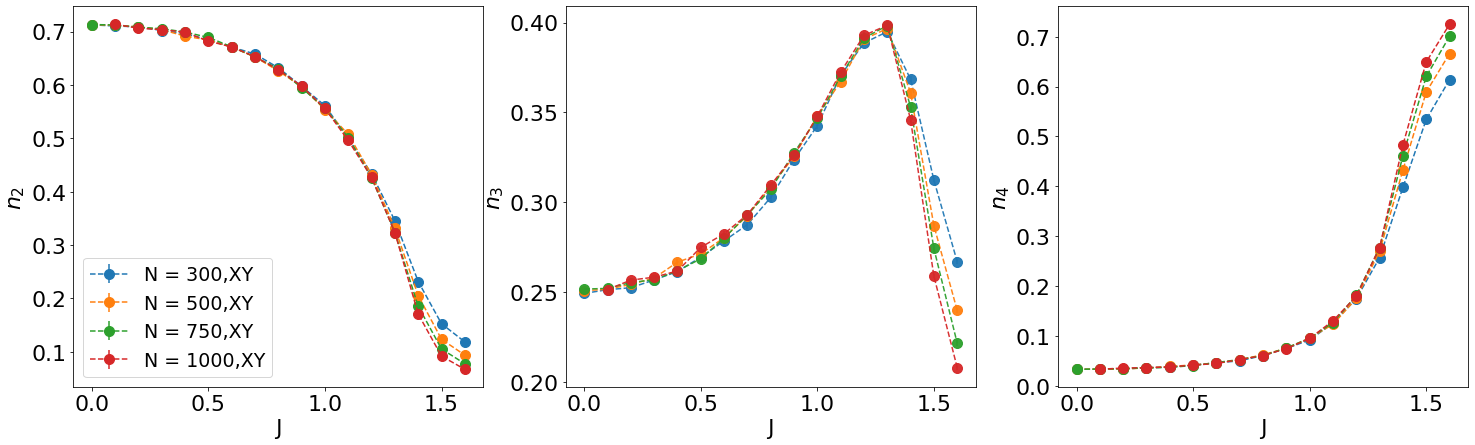

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(25,7)) #,  sharey='row')
axes = axes.reshape(-1)

 
data_np = np.loadtxt("CPP/Iteration0/XY_Iteration0.3.txt", skiprows=1)

y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    if (l==100 or l ==400): continue
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[1].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], alpha = 0.95, fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",XY")
    axes[2].errorbar(J_l, data_l[:,26], yerr=data_l[:,27], fmt="o--", ms = 10, label = "N = " + str(int(l)) + ",CY")
    
  
#axes[1].axvline(0.667, c ="k") 
#axes[0].axvline(0.667, c ="k") 
#axes[2].axvline(0.667, c ="k") 


#axes[1].axvline(0.832, c ="brown", ls = "--") 
#axes[0].axvline(0.832, c ="brown", ls = "--") 
#axes[2].axvline(0.832, c ="brown", ls = "--") 
 
    
#axes[0].set_title(r'$n_2$', fontsize=22)    
#axes[1].set_title(r'$n_3$', fontsize=22)    
#axes[2].set_title(r'$n_4$', fontsize=22)    
axes[0].set_ylabel(r'$n_2$', fontsize=22)    
axes[1].set_ylabel(r'$n_3$', fontsize=22)    
axes[2].set_ylabel(r'$n_4$', fontsize=22)  

axes[0].legend(fontsize = 19)
#axes[1].legend(fontsize = 10)
#axes[2].legend(fontsize = 11)


for i in range(3):
    axes[i].set_xlabel("J", fontsize=22)
    axes[i].tick_params(axis='x', labelsize=22) 
    axes[i].tick_params(axis='y', labelsize=22) 
    
    
#plt.tight_layout()

plt.savefig("Thesis/Images/bulk_shortchains.png", bbox_inches='tight')